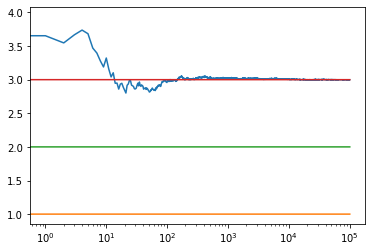

1.3121749188224994
2.4943163645521813
2.9971724571881775


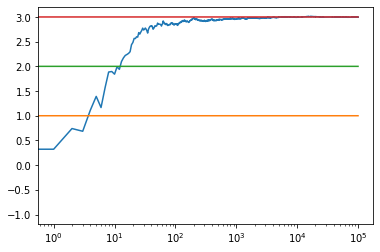

2.9408808237523187
2.9056493310412366
2.995990420021899


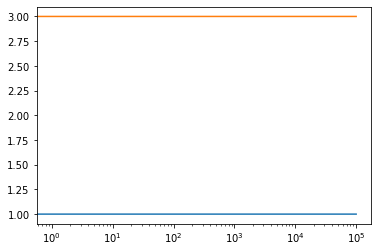

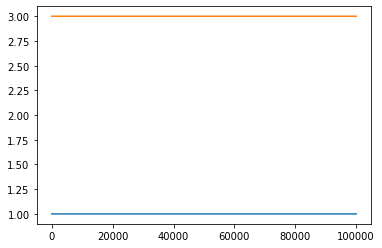

1.0
1.0
1.0
total reward earned: 100000.0
overall win rate: 1.0
num times selected each bandit: [33335.0, 33334.0, 33334.0]


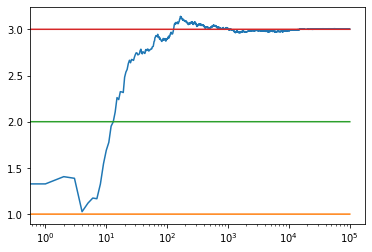

C:\Users\direw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


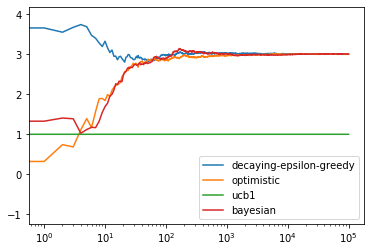

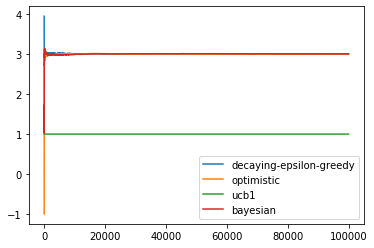

In [51]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
#from comparing_epsilons import Bandit
#from optimistic_initial_values import run_experiment as run_experiment_oiv
#from ucb1 import run_experiment as run_experiment_ucb
#  COMBINED BANDITS
class Bandit:
  def __init__(self1, m):
    self1.m = m
    self1.mean = 0
    self1.N = 0

  def pull(self1):
    return np.random.randn() + self1.m

  def update(self1, x):
    self1.N += 1
    self1.mean = (1 - 1.0/self1.N)*self1.mean + 1.0/self1.N*x
    
class Bandit_oiv:
  def __init__(self2, m, upper_limit):
    self2.m = m
    self2.mean = upper_limit
    self2.N = 1

  def pull(self2):
    return np.random.randn() + self2.m

  def update(self2, x):
    self2.N += 1
    self2.mean = (1 - 1.0/self2.N)*self2.mean + 1.0/self2.N*x
    
class BayesianBandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # parameters for mu - prior is N(0,1)
    self.predicted_mean = 0
    self.lambda_ = 1
    self.sum_x = 0 # for convenience
    self.tau = 1

  def pull(self):
    return np.random.randn() + self.true_mean

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.predicted_mean = self.tau*self.sum_x / self.lambda_

class Bandit_ucb:
  def __init__(self3, p):
    # p: the win rate
    self3.p = p
    self3.p_estimate = 0.
    self3.N = 0. # num samples collected so far

  def pull(self3):
    # draw a 1 with probability p
    return np.random.random() < self3.p

  def update(self3, x):
    self3.N += 1.
    self3.p_estimate = ((self3.N - 1)*self3.p_estimate + x) / self3.N
    
def ucb(mean, n, nj):
  return mean + np.sqrt(2*np.log(n) / nj)

def run_experiment_decaying_epsilon(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < 1.0/(i+1):
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average


def run_experiment_ucb(m1, m2, m3, N):
  BANDIT_PROBABILITIES = [m1,m2,m3]
  bandits = [Bandit_ucb(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(N)
  total_plays = 0

  # initialization: play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)
  
  for i in range(N):
    j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    # for the plot
    rewards[i] = x
  cumulative_average = np.cumsum(rewards) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / N)
  print("num times selected each bandit:", [b.N for b in bandits])

  return cumulative_average


def run_experiment(m1, m2, m3, N):
  bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  return cumulative_average

def run_experiment_oiv(m1, m2, m3, N):
  
  bandits = [Bandit_oiv(m1, 10), Bandit_oiv(m2, 10), Bandit_oiv(m3, 10)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average  

if __name__ == '__main__':
  m1 = 1.0
  m2 = 2.0
  m3 = 3.0
  eps = run_experiment_decaying_epsilon(m1, m2, m3, 100000)
  oiv = run_experiment_oiv(m1, m2, m3, 100000)
  ucb = run_experiment_ucb(m1, m2, m3, 100000)
  bayes = run_experiment(m1, m2, m3, 100000)

  # log scale plot
  plt.plot(eps, label='decaying-epsilon-greedy')
  plt.plot(oiv, label='optimistic')
  plt.plot(ucb, label='ucb1')
  plt.plot(bayes, label='bayesian')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(eps, label='decaying-epsilon-greedy')
  plt.plot(oiv, label='optimistic')
  plt.plot(ucb, label='ucb1')
  plt.plot(bayes, label='bayesian')
  plt.legend()
  plt.show()